In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [ ]:
# Database connection
user = 'root'
password = '123'
host = '127.0.0.1'
port = 3306
database = 'project_db'

# Create SQLAlchemy engine
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")

In [6]:
# Load the combined dataset
query = """
SELECT region, month, price, 'Regular' AS fuel_type FROM regular_gas_prices_canada
UNION ALL
SELECT region, month, price, 'Premium' AS fuel_type FROM premium_gas_prices_canada
UNION ALL
SELECT region, month, price, 'Diesel' AS fuel_type FROM diesel_prices_canada;
"""
df_combined = pd.read_sql(query, con=engine)

In [7]:
# Ensure 'month' is in datetime format
df_combined['month'] = pd.to_datetime(df_combined['month'], format='%Y-%m')

In [8]:
# Extract year and month as numerical values for correlation analysis
df_combined['year'] = df_combined['month'].dt.year
df_combined['month_num'] = df_combined['month'].dt.month

In [9]:
# Pivot data for heatmap preparation
correlation_data = df_combined.pivot_table(
    index='region',
    columns='month_num',
    values='price',
    aggfunc='mean'
)

In [11]:
# Calculate correlation
correlation_matrix = correlation_data.corr()

# Display the correlation matrix
print(correlation_matrix)

month_num        1         2         3         4         5         6   \
month_num                                                               
1          1.000000  0.980732  0.889947  0.851117  0.872043  0.883331   
2          0.980732  1.000000  0.942997  0.906100  0.910893  0.900592   
3          0.889947  0.942997  1.000000  0.983593  0.975321  0.946941   
4          0.851117  0.906100  0.983593  1.000000  0.984546  0.950512   
5          0.872043  0.910893  0.975321  0.984546  1.000000  0.973976   
6          0.883331  0.900592  0.946941  0.950512  0.973976  1.000000   
7          0.889581  0.914380  0.945668  0.932173  0.958645  0.985549   
8          0.691731  0.724426  0.825540  0.786645  0.829872  0.874055   
9          0.740277  0.735384  0.827459  0.801459  0.847017  0.902689   
10         0.902021  0.901338  0.935203  0.906310  0.931890  0.944820   
11         0.905904  0.883012  0.854862  0.805274  0.839352  0.844656   
12         0.948829  0.909106  0.832481  0.780845  

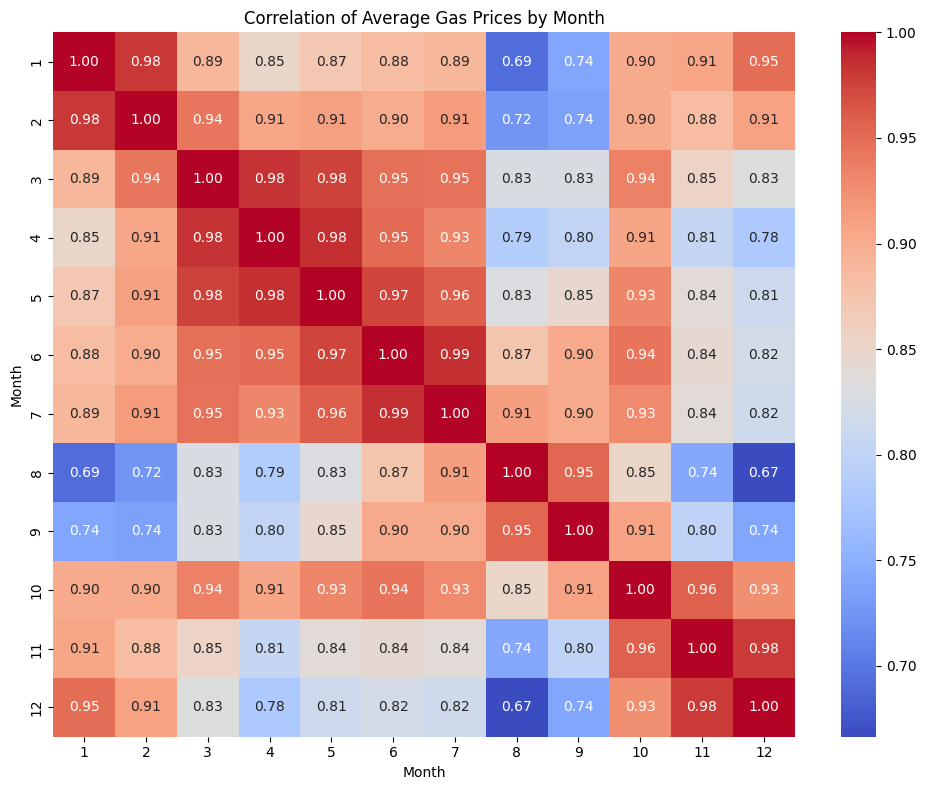

In [12]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)

plt.title("Correlation of Average Gas Prices by Month")
plt.xlabel("Month")
plt.ylabel("Month")
plt.tight_layout()
plt.show()

In [13]:
# Pivot data to prepare for city-wise correlation
city_correlation_data = df_combined.pivot_table(
    index='month',
    columns='region',
    values='price',
    aggfunc='mean'
)

# Calculate correlation between cities
city_correlation_matrix = city_correlation_data.corr()

# Display the city correlation matrix
print(city_correlation_matrix)

region                                              Calgary, Alberta  \
region                                                                 
Calgary, Alberta                                            1.000000   
Canada                                                      0.917392   
Charlottetown and Summerside, Prince Edward Island          0.402972   
Edmonton, Alberta                                           0.979677   
Halifax, Nova Scotia                                        0.346034   
Montréal, Quebec                                            0.408354   
Ottawa-Gatineau, Ontario part, Ontario/Quebec               0.742881   
Québec, Quebec                                              0.123077   
Regina, Saskatchewan                                        0.744866   
Saint John, New Brunswick                                   0.206574   
Saskatoon, Saskatchewan                                     0.848905   
St. John's, Newfoundland and Labrador                       0.30

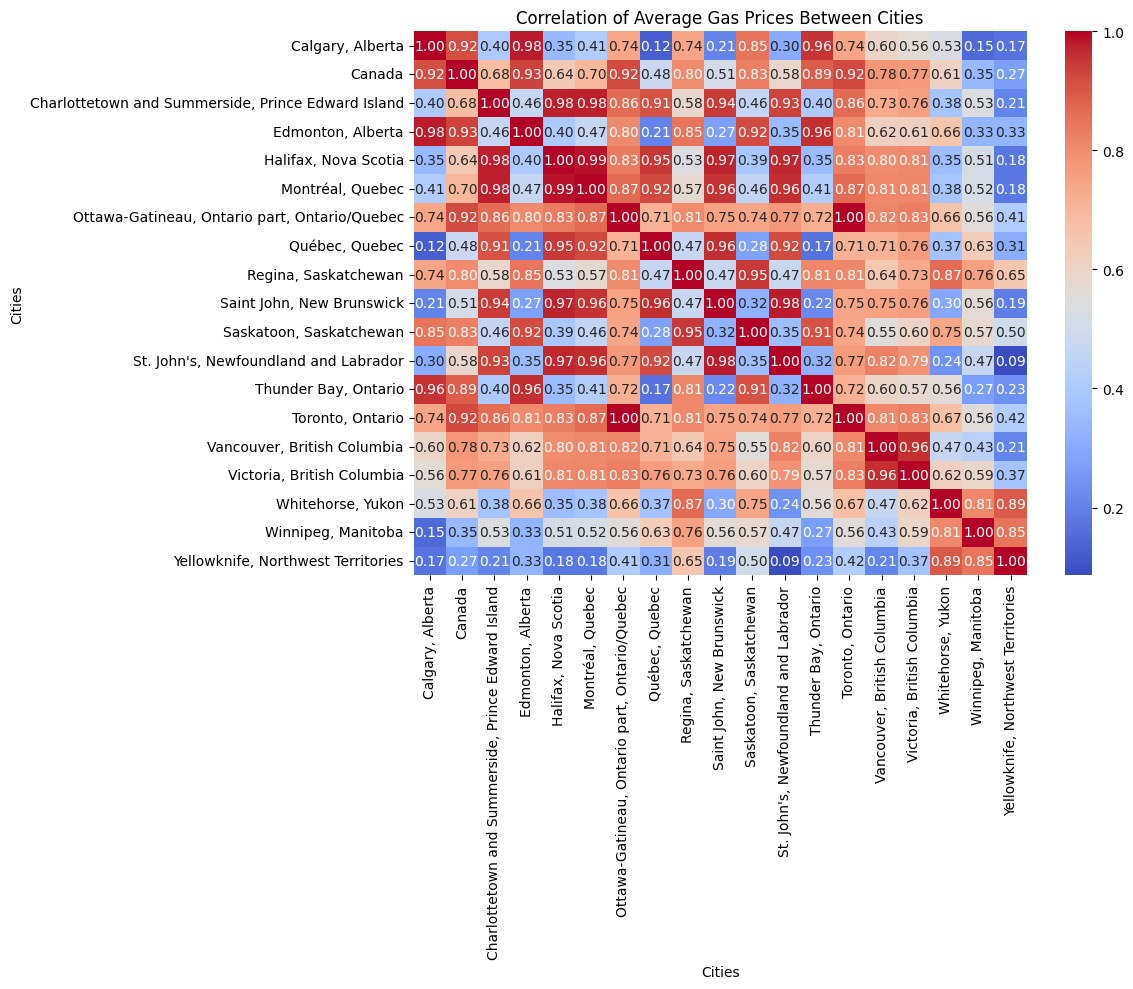

In [14]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(city_correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)

plt.title("Correlation of Average Gas Prices Between Cities")
plt.xlabel("Cities")
plt.ylabel("Cities")
plt.tight_layout()
plt.show()